In [8]:
import matplotlib.pyplot as plt
import numpy as np

## Experimental data

In [120]:
R = 8.31
rho = 13600
H = 2.6
g = 9.8
dd = 0.5 * 0.1 #cm
dt = 0.01

In [121]:
Pshot = np.array([7.585 - 5.85, 7.56 - 5.73, 7.76 - 5.61,
                 7.85 - 5.55, 7.925 - 5.5, 8 - 5.44, 8.1 - 5.32, 8.22 - 5.25, 8.35 - 5.15,
                 8.55 - 4.92, 8.8 - 4.7, 9.2 - 4.345]) # 
Tshot = np.array([23.14, 24, 27, 28, 29, 30, 31, 32, 33, 35, 37, 40])
Tshot = [T+273 for T in Tshot]


Pscold = np.array([8.955 - 4.55, 8.6 - 4.855, 8.38 - 5.05, 8.16 - 5.24,
                  8 - 5.4, 7.83 - 5.55, 7.66 - 5.7])
Tscold = np.array([37, 34, 32, 30, 28, 26, 24])
Tscold = [T+273 for T in Tscold]

In [122]:
Pscold* 10

array([44.05, 37.45, 33.3 , 29.2 , 26.  , 22.8 , 19.6 ])

In [123]:
[np.log(p) for p in Pshot]

[0.5510074133988228,
 0.6043159668533291,
 0.7654678421395712,
 0.8329091229351039,
 0.8858315243894465,
 0.9400072584914709,
 1.0224509277025455,
 1.0885619528146084,
 1.1631508098056806,
 1.2892326482767595,
 1.4109869737102623,
 1.5800091017432882]

## Plots

In [124]:
xh = Tshot
xc = Tscold

yh = Pshot
yc = Pscold

dy = [dd for i in range(len(Tshot))]
dx = [dt for i in range(len(Tshot))]

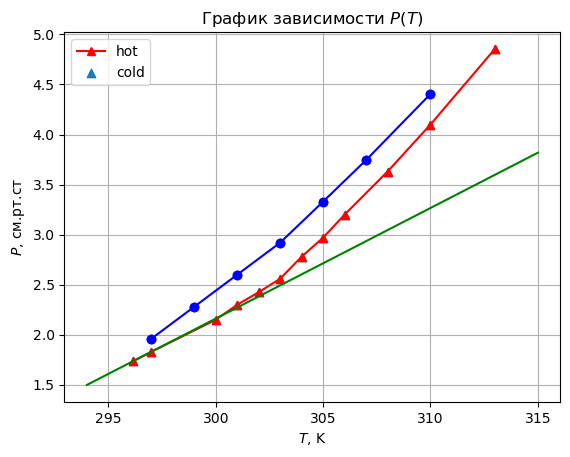

In [125]:
fig, ax = plt.subplots()
#plt.errorbar(xh, yh, yerr=dy, xerr=dx, fmt='-', ecolor='red')
ax.plot(xh, yh, 'r^-')
plt.scatter(xh, yh, marker='^')

model1 = np.poly1d(np.polyfit(xh[:2], yh[:2], 1))
model2 = np.poly1d(np.polyfit(xh[2:4], yh[2:4], 1))
model3 = np.poly1d(np.polyfit(xh[4:6], yh[4:6], 1))
model4 = np.poly1d(np.polyfit(xh[6:8], yh[6:8], 1))
model5 = np.poly1d(np.polyfit(xh[8:10], yh[8:10], 1))
model6 = np.poly1d(np.polyfit(xh[10:12], yh[10:12], 1))
polyline = np.linspace(294, 315)
plt.plot(polyline, model1(polyline), color = 'green')

ax.plot(xc, yc, 'bo-')
plt.scatter(xc, yc, color="blue")

ax.set_title('График зависимости $P (T)$')
plt.grid()

plt.legend (('hot', 'cold'))

plt.xlabel('$T$, K')
plt.ylabel('$P$, см.рт.ст')

#plt.show()
plt.savefig('simpleplot.png')

# Errors Hot

In [126]:
models = [model1.c[0], (model2.c)[0], model3.c[0], model4.c[0], 
          model5.c[0], model6.c[0]]

Tsav = [0.5 * (Tshot[i] + Tshot[i+1]) for i in range(0, 12, 2)]
print(Tsav)
Psav = [0.5 * (Pshot[i] + Pshot[i+1]) for i in range(0, 12, 2)]
Lsh = [models[i] * 0.01 * g * rho * R * Tsav[i]**2 / (Psav[i] * 0.01 * g * rho) for i in range(len(Tsav))]

[296.57, 300.5, 302.5, 304.5, 307.0, 311.5]


In [127]:
Tsav

[296.57, 300.5, 302.5, 304.5, 307.0, 311.5]

In [128]:
[round(L, 2) for L in Lsh]

[45295.08, 50588.43, 41186.07, 50920.35, 49308.92, 45321.81]

In [129]:
sigmas = [models[i] * ((2 * R * Tsav[i] * dt / Psav[i])**2 + 
                      (R * Tsav[i]**2 * dd / Psav[i]**2)**2)**0.5
        for i in range(len(Psav))]

In [130]:
[round(s, 2) for s in sigmas]

[1270.55, 1136.82, 826.2, 885.58, 721.95, 506.11]

In [132]:
np.average(Lsh)

47103.44508802234

In [133]:
max(sigmas)

1270.5530251574712

In [143]:
max(sigmas) / np.average(Lsh)

0.021214012674036338

# Errors Cold

In [134]:
model1 = np.poly1d(np.polyfit(xc[:2], yc[:2], 1))
model2 = np.poly1d(np.polyfit(xc[2:4], yc[2:4], 1))
model3 = np.poly1d(np.polyfit(xc[4:6], yc[4:6], 1))
model1

poly1d([  0.22 , -63.795])

In [135]:
models = [model1.c[0], (model2.c)[0], model3.c[0]]
Tsav = [0.5 * (Tscold[i] + Tscold[i+1]) for i in range(0, 6, 2)]
print(Tsav)
Psav = [0.5 * (Pscold[i] + Pscold[i+1]) for i in range(0, 6, 2)]
Lsh = [models[i] * 0.01 * g * rho * R * Tsav[i]**2 / (Psav[i] * 0.01 * g * rho) for i in range(len(Tsav))]

[308.5, 304.0, 300.0]


In [136]:
sigmas = [models[i] * ((2 * R * Tsav[i] * dt / Psav[i])**2 + 
                      (R * Tsav[i]**2 * dd / Psav[i]**2)**2)**0.5
        for i in range(len(Psav))]

In [137]:
Tsav

[308.5, 304.0, 300.0]

In [138]:
[round(L, 2) for L in Lsh]

[42697.89, 50379.29, 49042.62]

In [139]:
[round(s, 2) for s in sigmas]

[523.91, 806.08, 1004.98]

In [140]:
np.average(Lsh)

47373.267641864

In [141]:
max(sigmas)

1004.9771001650184

In [147]:
xh = [1000000/T for T in Tshot]
yh = [np.log(P * 0.01 * g * rho ) for P in Pshot]

xc = [1000000/T for T in Tscold]
yc = [np.log(P * 0.01 * g * rho) for P in Pscold]

dyh = [dd/p for p in Pshot]
dxh = [dt*x for x in xh]

dxc = [dt*x for x in xc]
dyc = [dd/p for p in Pscold]

mhot =   
-0.005758 x + 27.17
mcold =   
-0.005712 x + 27.12


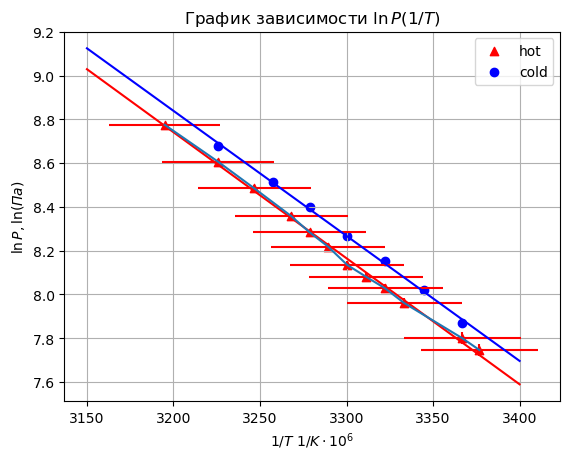

In [148]:
fig, ax = plt.subplots()
#ax.plot(xh, yh, 'r^-')
plt.errorbar(xh, yh, yerr=dyh, xerr=dxh, fmt='-', ecolor='red')
plt.scatter(xh, yh, color="red", marker='^')

#ax.plot(xc, yc, 'bo-')
plt.scatter(xc, yc, color="blue")
ax.set_title('График зависимости $\ln P (1/T)$')
plt.grid()


model1 = np.poly1d(np.polyfit(xh, yh, 1))
polyline = np.linspace(3150, 3400)
plt.plot(polyline, model1(polyline), color = 'red')

model2 = np.poly1d(np.polyfit(xc, yc, 1))
plt.plot(polyline, model2(polyline), color = 'blue')


plt.xlabel('$1/T$ $1/K \cdot 10^6$')
plt.ylabel('$\ln P, \ln(Па)$')

plt.legend (('hot', 'cold'))

print("mhot = ", model1)
print("mcold = ", model2)

#plt.show()
plt.savefig('complexplot.png')

In [149]:
Lhot = R * 0.005758
Lcold  = R * 0.005712
Lhot, Lcold

(0.047848980000000006, 0.047466720000000004)

In [154]:
Tshot

[296.14,
 297.0,
 300.0,
 301.0,
 302.0,
 303.0,
 304.0,
 305.0,
 306.0,
 308.0,
 310.0,
 313.0]

In [151]:
[((R * yh[i] * dt)**2 + (R * Tshot[i] * dd / Pshot[i])**2)**0.5 for i in range(len(Tshot))]

[70.92290386313313,
 67.43672116122184,
 57.980518042230734,
 54.38039652991787,
 51.74909942946738,
 49.18296651051391,
 45.441102505124526,
 42.67474415031736,
 39.73825794711039,
 35.26159469733616,
 31.42399267756255,
 26.797050160978866]

In [153]:
7 / 47

0.14893617021276595

In [155]:
[((R * yc[i] * dt)**2 + (R * Tscold[i] * dd / Pscold[i])**2)**0.5 for i in range(len(Tscold))]

[29.249526347284966,
 34.06836462514058,
 38.06270456274429,
 43.12071202389537,
 48.10688364591361,
 54.492890642142065,
 62.96436419894287]

In [152]:
2300 * 0.018

41.4

In [156]:
[P * 0.01 * g * rho for P in Pshot]

[2312.4080000000004,
 2439.0239999999994,
 2865.5199999999995,
 3065.44,
 3232.04,
 3411.968,
 3705.1839999999993,
 3958.4160000000015,
 4264.959999999999,
 4838.064000000001,
 5464.480000000001,
 6470.744]

In [157]:
[P * 0.01 * g * rho for P in Pscold]

[5870.984000000001,
 4991.335999999999,
 4438.224000000002,
 3891.7760000000003,
 3465.2799999999997,
 3038.7840000000006,
 2612.288]

In [158]:
[P * 10 for P in Pshot]

[17.35,
 18.29999999999999,
 21.499999999999993,
 23.0,
 24.25,
 25.599999999999994,
 27.799999999999994,
 29.700000000000006,
 31.999999999999993,
 36.30000000000001,
 41.00000000000001,
 48.55]